In [ ]:
!unzip Deepdive.zip -d Deepdive

In [15]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
dataset_path = "./Deepdive"
import os
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')
validation_dir = os.path.join(dataset_path, 'validation')

In [17]:
train_data = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest',  # Fill any empty pixels after transformation
    validation_split=0.2  # Split 20% of training data for validation
)
test_data = ImageDataGenerator(rescale=1.0/255)
validation_data = ImageDataGenerator(rescale=1.0/255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


print("Classes found in the dataset:", train_generator.class_indices)
print("Classes found in the dataset:", test_generator.class_indices)
print("Classes found in the dataset:", validation_generator.class_indices)


Found 2667 images belonging to 33 classes.
Found 660 images belonging to 33 classes.
Found 667 images belonging to 33 classes.
Classes found in the dataset: {'Anthomastus Like coral': 0, 'Arborescent Stumpy Grey Branching Erect sponges': 1, 'Arborescent coral': 2, 'Attached Stony coral': 3, 'Bioturbation - Organism tests': 4, 'Bony fishes': 5, 'Colonial Unstalked Ascidian': 6, 'Crab': 7, 'Ctenophores jellies': 8, 'Cup-likes sponges': 9, 'Eels': 10, 'Feather stars': 11, 'Free-living coral': 12, 'General unknown biology': 13, 'Hermit Crab with Shell or Stone': 14, 'Irregular urchins': 15, 'Laminar Erect sponges': 16, 'Octopods': 17, 'Other anemones': 18, 'Prawns - Shrimps - Mysids': 19, 'Quill (Sea pen) coral': 20, 'Sea Cucumber': 21, 'Sea stars': 22, 'Sea urchins': 23, 'Sea whip coral': 24, 'Simple Branching coral': 25, 'Snake stars': 26, 'Squat lobsters': 27, 'Stalked Erect sponges': 28, 'True lobsters': 29, 'Tube anemones': 30, 'Tube worms': 31, 'Woody debris': 32}
Classes found in th

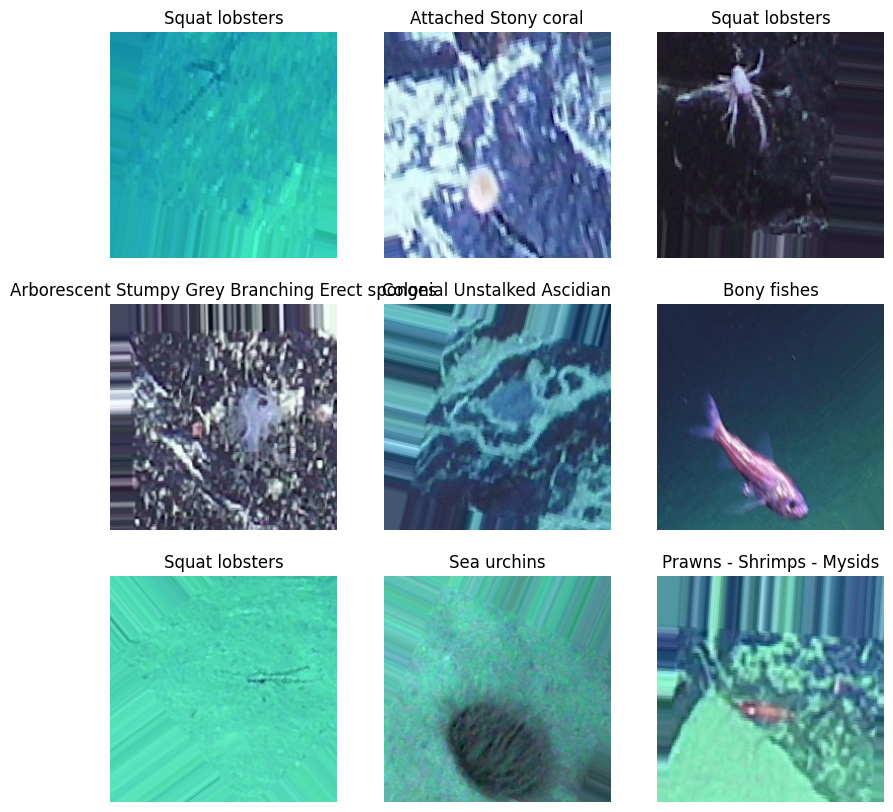

In [25]:
import matplotlib.pyplot as plt

# Get class names from the generator
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(10, 10))
# Fetch one batch of images and labels
images, labels = next(train_generator)

# Plot 9 images from the batch
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((images[i]*255).astype("uint8"))  # Directly display the image
    plt.title(class_names[labels[i].argmax()])  # Convert label to class name using argmax
    plt.axis("off")
plt.show()
